In [1]:
import pandas as pd
import numpy as np
import math
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

import platform
from os import listdir
from os.path import isfile, join
from glob import glob
from pathlib import Path
import sys
import os
import copy
import traceback



import matplotlib.pyplot as plt

import SMOTE
import feature_selector
import DE
import CFS
import metrics.abcd

import metrices
import measures

import sys
import traceback
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_source = '/Users/suvodeepmajumder/Documents/AI4SE/bellwether_comminity/data/1385/converted/'
projects = ['firebird.csv','amanda.csv','flylinkdc.csv']

In [3]:
def prepare_data(path):
    df = pd.read_csv(path)
    df = df.drop(labels = ['Host','Vcs','Project','File','PL','IssueTracking'],axis=1)
    df = df.dropna()
    df = df[['TLOC', 'TNF', 'TNC', 'TND', 'LOC', 'CL', 'NStmt', 'NFunc',
       'RCC', 'MNL', 'avg_WMC', 'max_WMC', 'total_WMC', 'avg_DIT', 'max_DIT',
       'total_DIT', 'avg_RFC', 'max_RFC', 'total_RFC', 'avg_NOC', 'max_NOC',
       'total_NOC', 'avg_CBO', 'max_CBO', 'total_CBO', 'avg_DIT.1',
       'max_DIT.1', 'total_DIT.1', 'avg_NIV', 'max_NIV', 'total_NIV',
       'avg_NIM', 'max_NIM', 'total_NIM', 'avg_NOM', 'max_NOM', 'total_NOM',
       'avg_NPBM', 'max_NPBM', 'total_NPBM', 'avg_NPM', 'max_NPM', 'total_NPM',
       'avg_NPRM', 'max_NPRM', 'total_NPRM', 'avg_CC', 'max_CC', 'total_CC',
       'avg_FANIN', 'max_FANIN', 'total_FANIN', 'avg_FANOUT', 'max_FANOUT',
       'total_FANOUT', 'NRev', 'NFix', 'avg_AddedLOC', 'max_AddedLOC',
       'total_AddedLOC', 'avg_DeletedLOC', 'max_DeletedLOC',
       'total_DeletedLOC', 'avg_ModifiedLOC', 'max_ModifiedLOC',
       'total_ModifiedLOC','Buggy']]
    return df

def get_features(df):
    fs = feature_selector.featureSelector()
    df,_feature_nums,features = fs.cfs_bfs(df)
    return df,features

def apply_cfs(df):
    y = df.Buggy.values
    X = df.drop(labels = ['Buggy'],axis = 1)
    X = X.values
    selected_cols = CFS.cfs(X,y)
    cols = df.columns[[selected_cols]].tolist()
    cols.append('Buggy')
    return df[cols],cols
    
def apply_smote(df):
    cols = df.columns
    smt = SMOTE.smote(df)
    df = smt.run()
    df.columns = cols
    return df

In [66]:
final_score = []
count = 0
for s_project in projects:
    try:
        s_path = '/Users/suvodeepmajumder/Documents/AI4SE/bellwether_comminity/data/1385/converted/' + s_project
        print(s_project)
        df = prepare_data(s_path)
        if df.shape[0] < 50:
            continue
        else:
            count+=1
        df.reset_index(drop=True,inplace=True)
        d = {'buggy': True, 'clean': False}
        df['Buggy'] = df['Buggy'].map(d)
        y = df.Buggy
        X = df.drop(labels = ['Buggy'],axis = 1)
        kf = StratifiedKFold(n_splits = 5)
        score = {}
        F = {}
        for i in range(5):
            for train_index, tune_index in kf.split(X, y):
                X_train, X_tune = X.iloc[train_index], X.iloc[tune_index]
                y_train, y_tune = y[train_index], y[tune_index]
                _df_tune_loc = X_tune.LOC
                clf = LogisticRegression()
                clf.fit(X_train,y_train)
                final_score.append(clf.coef_[0])
    except Exception as e:
        print(e)
        continue

firebird.csv
amanda.csv
flylinkdc.csv


In [67]:
final_score_df = pd.DataFrame(final_score, columns = X.columns)

TLOC


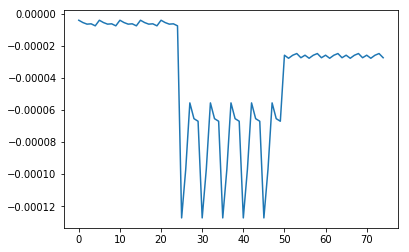

TNF


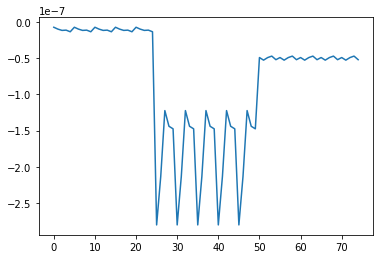

TNC


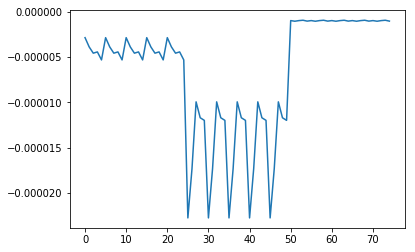

TND


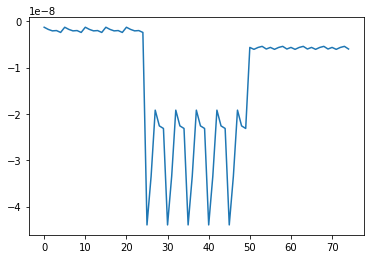

LOC


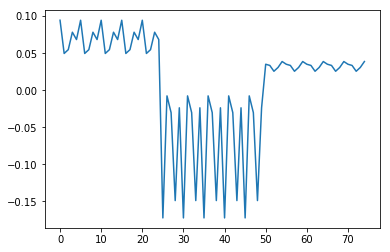

CL


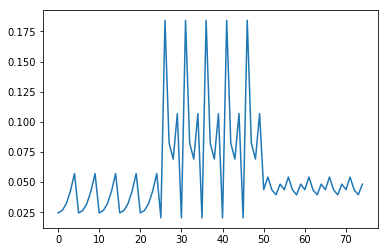

NStmt


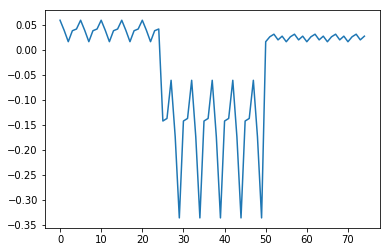

NFunc


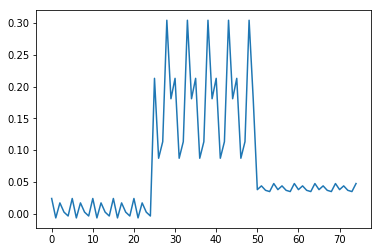

RCC


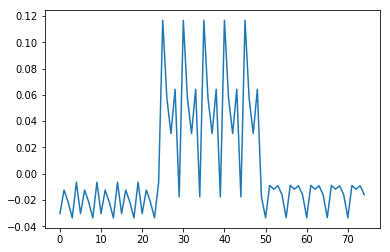

MNL


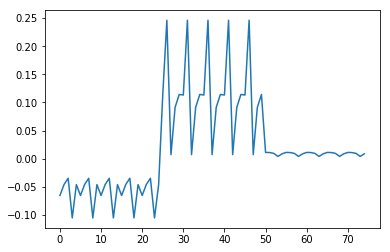

avg_WMC


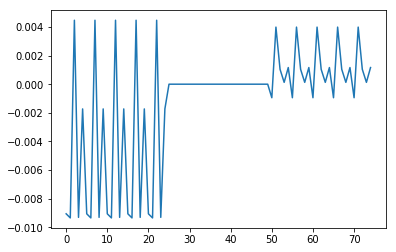

max_WMC


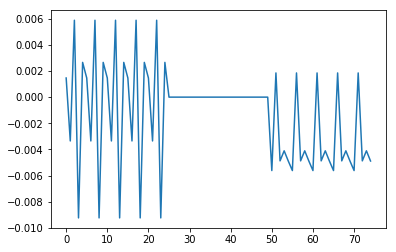

total_WMC


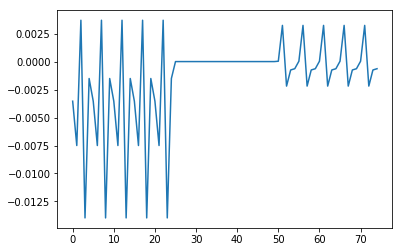

avg_DIT


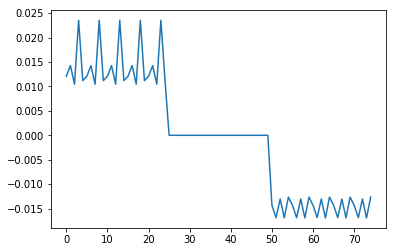

max_DIT


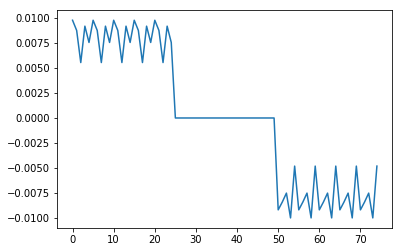

total_DIT


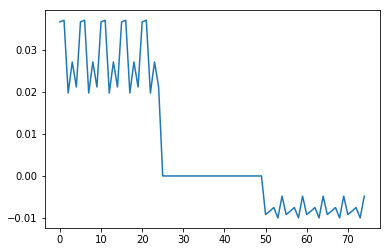

avg_RFC


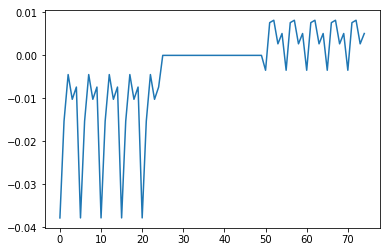

max_RFC


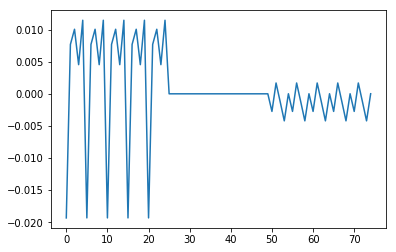

total_RFC


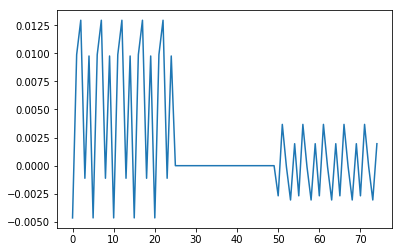

avg_NOC


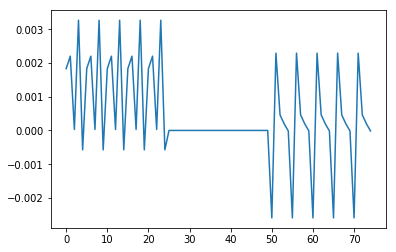

max_NOC


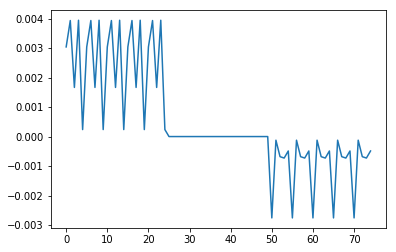

total_NOC


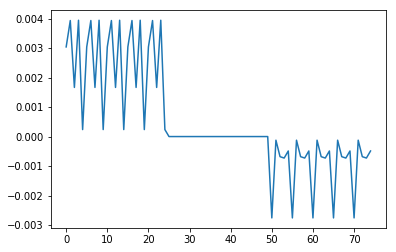

avg_CBO


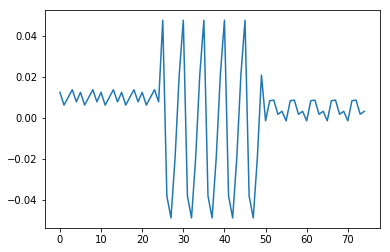

max_CBO


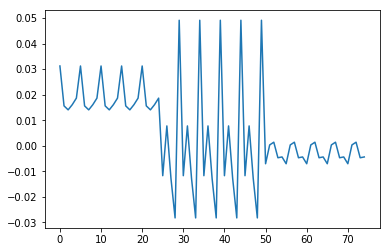

total_CBO


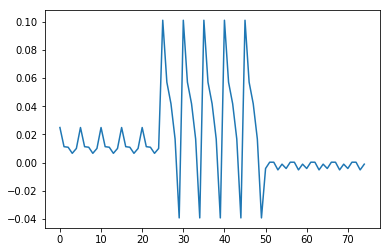

avg_DIT.1


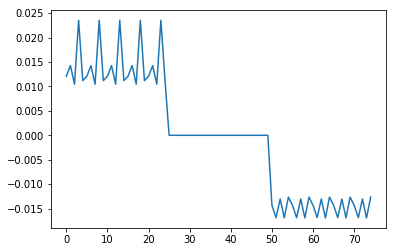

max_DIT.1


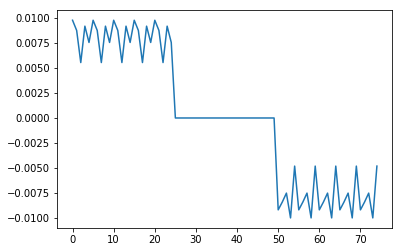

total_DIT.1


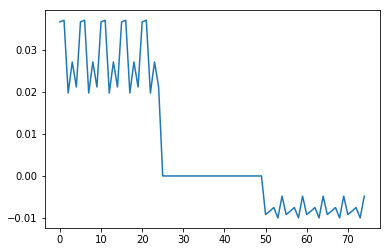

avg_NIV


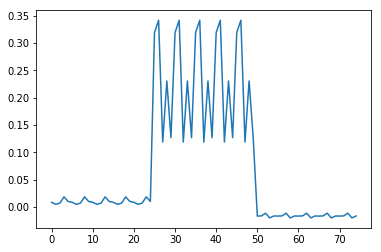

max_NIV


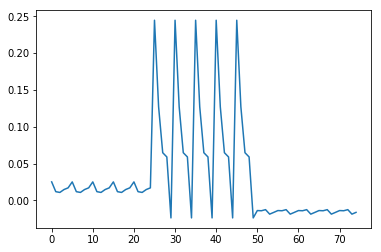

total_NIV


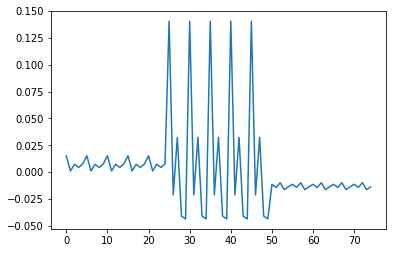

avg_NIM


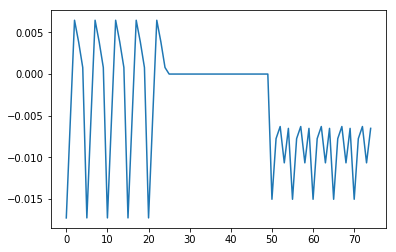

max_NIM


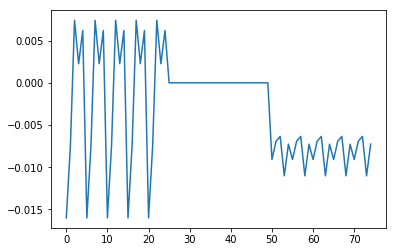

total_NIM


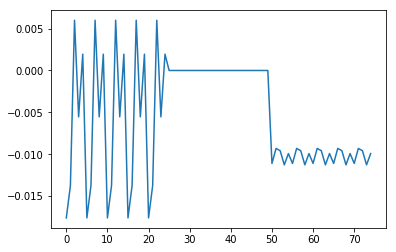

avg_NOM


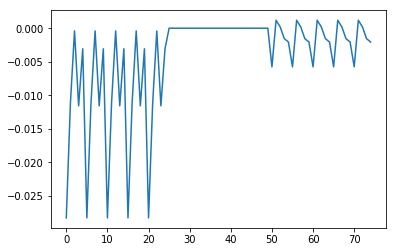

max_NOM


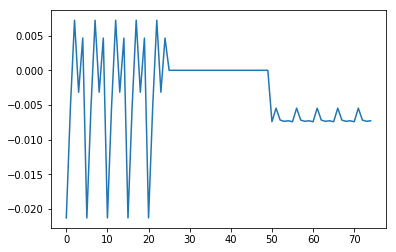

total_NOM


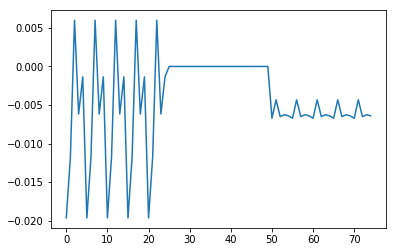

avg_NPBM


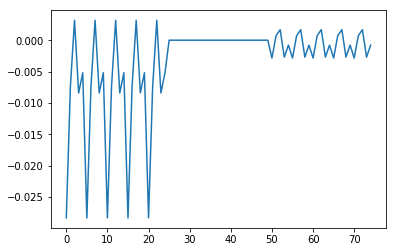

max_NPBM


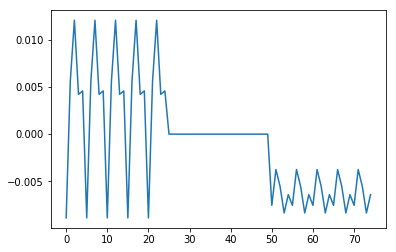

total_NPBM


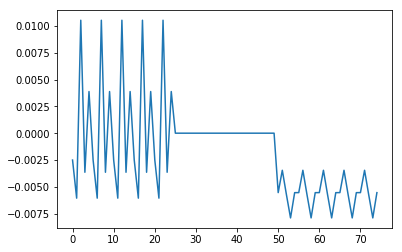

avg_NPM


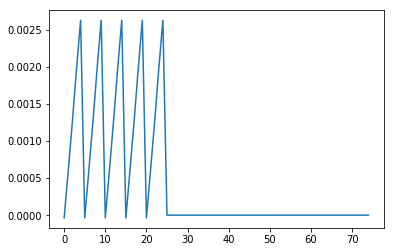

max_NPM


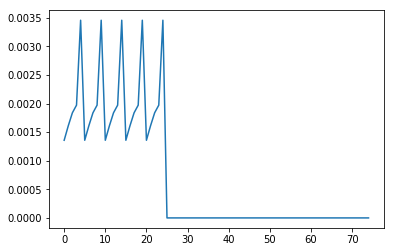

total_NPM


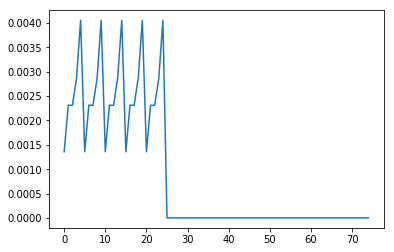

avg_NPRM


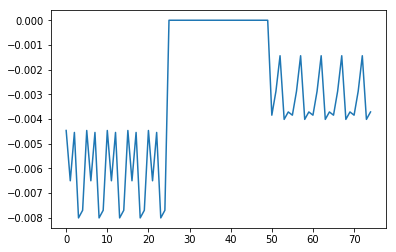

max_NPRM


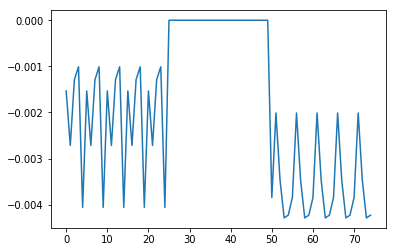

total_NPRM


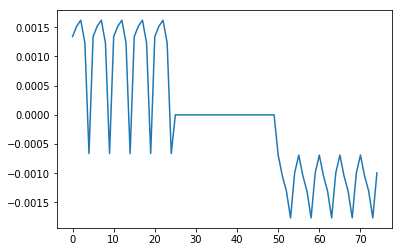

avg_CC


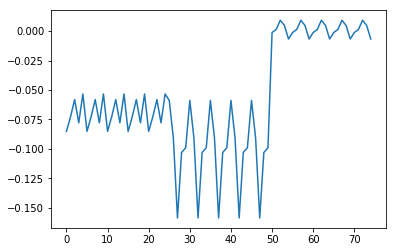

max_CC


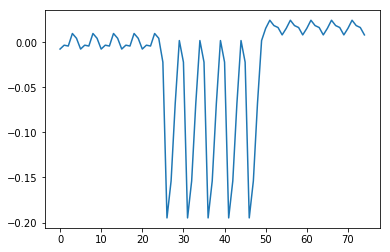

total_CC


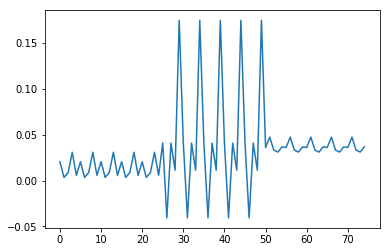

avg_FANIN


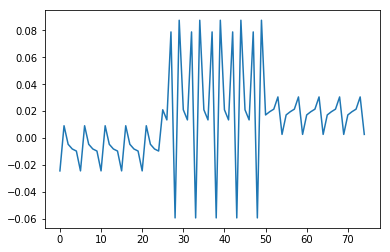

max_FANIN


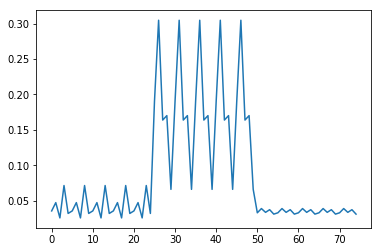

total_FANIN


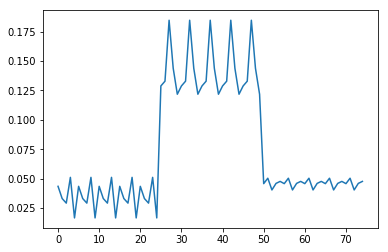

avg_FANOUT


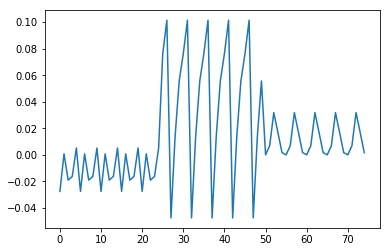

max_FANOUT


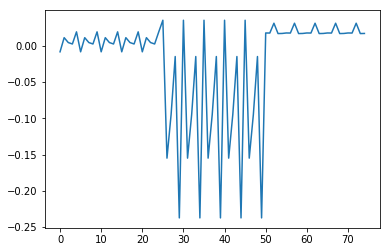

total_FANOUT


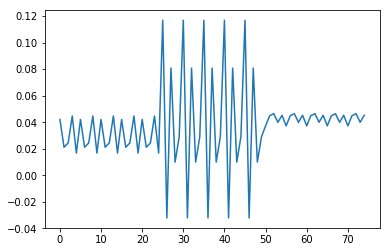

NRev


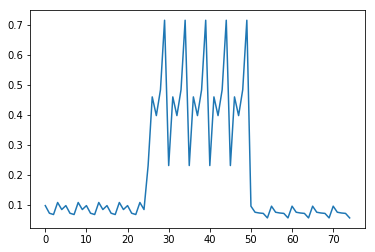

NFix


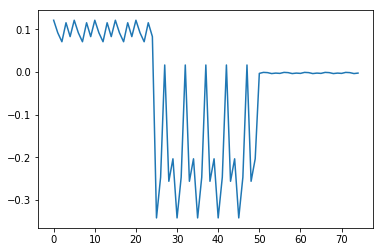

avg_AddedLOC


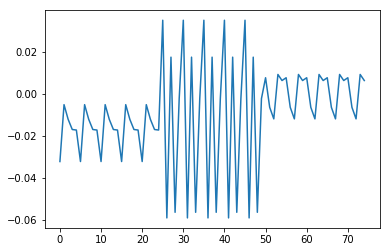

max_AddedLOC


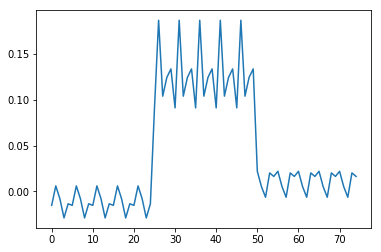

total_AddedLOC


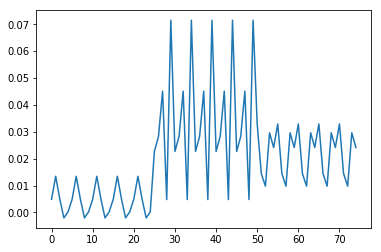

avg_DeletedLOC


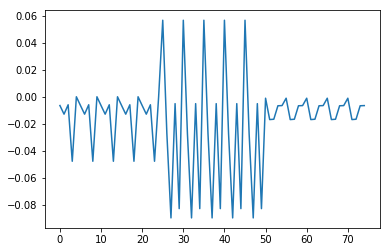

max_DeletedLOC


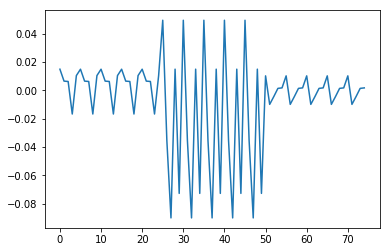

total_DeletedLOC


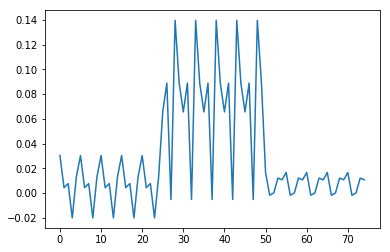

avg_ModifiedLOC


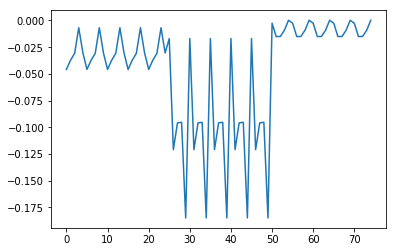

max_ModifiedLOC


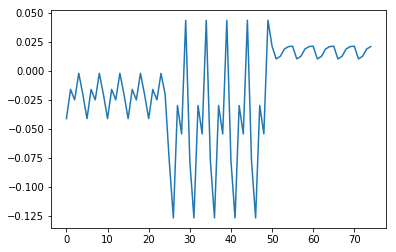

total_ModifiedLOC


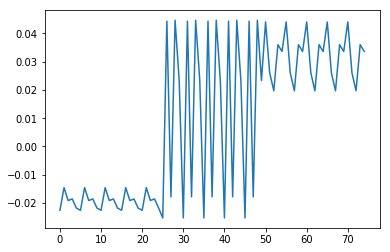

In [71]:
for cols in final_score_df:
    print(cols)
    plt.plot(final_score_df[cols])
    plt.show()

In [43]:
X.columns

Index(['TLOC', 'TNF', 'TNC', 'TND', 'LOC', 'CL', 'NStmt', 'NFunc', 'RCC',
       'MNL', 'avg_WMC', 'max_WMC', 'total_WMC', 'avg_DIT', 'max_DIT',
       'total_DIT', 'avg_RFC', 'max_RFC', 'total_RFC', 'avg_NOC', 'max_NOC',
       'total_NOC', 'avg_CBO', 'max_CBO', 'total_CBO', 'avg_DIT.1',
       'max_DIT.1', 'total_DIT.1', 'avg_NIV', 'max_NIV', 'total_NIV',
       'avg_NIM', 'max_NIM', 'total_NIM', 'avg_NOM', 'max_NOM', 'total_NOM',
       'avg_NPBM', 'max_NPBM', 'total_NPBM', 'avg_NPM', 'max_NPM', 'total_NPM',
       'avg_NPRM', 'max_NPRM', 'total_NPRM', 'avg_CC', 'max_CC', 'total_CC',
       'avg_FANIN', 'max_FANIN', 'total_FANIN', 'avg_FANOUT', 'max_FANOUT',
       'total_FANOUT', 'NRev', 'NFix', 'avg_AddedLOC', 'max_AddedLOC',
       'total_AddedLOC', 'avg_DeletedLOC', 'max_DeletedLOC',
       'total_DeletedLOC', 'avg_ModifiedLOC', 'max_ModifiedLOC',
       'total_ModifiedLOC'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
1,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
2,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
3,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
4,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
5,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
6,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
7,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
8,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747
9,-0.000006,-1.119747e-08,-4.415206e-06,-2.010518e-09,0.064808,0.038465,0.036534,0.010996,-0.019014,-0.047211,...,0.084155,-0.014764,-0.010033,0.003853,-0.010539,0.004723,0.006914,-0.030144,-0.021899,-0.018747


In [72]:
final_score_df.to_csv('data/1385/projects/coefs.csv')